In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\82107\\online'

In [3]:
# 데이터 불러오기

corolla = pd.read_csv('/Users/82107/data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nYar = corolla.shape[1]
print(nCar)
print(nYar)

1436
37


## 범주형 변수를 이진형 변수로 변환

In [5]:
## 가변수 생성
corolla.Fuel_Type.unique()
dummy_p = np.repeat(0,nCar)
dummy_b = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [6]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [7]:
dummy_p


array([0, 0, 0, ..., 0, 0, 0])

In [8]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Disel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [9]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [10]:
dummy_p[p_idx] = 1
dummy_b[d_idx] = 1
dummy_c[c_idx] = 1

In [11]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가

In [12]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Disel' : dummy_b, 'CNG' : dummy_c})

In [13]:
Fuel

,Petrol,Disel,CNG
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [14]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_,Fuel),1)
mlr_data.head()

C:\Users\82107\AppData\Local\Temp/ipykernel_22208/2583893356.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  mlr_data = pd.concat((corolla_,Fuel),1)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,0,0


In [15]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,0,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [16]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [17]:
# Train the MLR / 회귀모델적합

full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [18]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     309.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:00:48   Log-Likelihood:                -8460.3
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     971   BIC:                         1.716e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -326.9261    132.697     -2.464      0.014    -587.333     -66.520
Age_08_04         -120.6145      4.060    -29.706      0.000    -128.583    -112.647
Airbag_1           282.1321    264.157      1.068      0.286    -236.252     800.516
Airbag_2            -1.6683    133.973     -0.012      0.990    -264.578     261.242
Airco              101.3240     96.223      1.053      0.293     -87.504     290.152
Automatic          400.5864    152.865      2.621      0.009     100.603     700.570
Automatic_airco   2372.1003    199.719     11.877      0.000    1980.169    2764.032
BOVAG_Guarantee    403.9409    134.002      3.014      0.003     140.974     666.907
Backseat_Divider  -355.2213    135.539     -2.621      0.009    -621.204     -89.238
Boardcomputer     -209.9729    123.100     -1.706      0.088    -451.546      31.601
CD_Player          239.9914    105.384      2.277      0.023      33.184     446.799
CNG              -1203.3593    368.513     -3.265      0.001   -1926.533    -480.186
Central_Lock        12.2457    157.682      0.078      0.938    -297.191     321.682
Cylinders           -0.0315      0.002    -13.352      0.000      -0.036      -0.027
Disel             -6.53e-08   1.22e-08     -5.372      0.000   -8.92e-08   -4.15e-08
Doors               77.9863     42.922      1.817      0.070      -6.243     162.216
Gears              104.1904    203.040      0.513      0.608    -294.258     502.639
Guarantee_Period    62.8826     13.342      4.713      0.000      36.701      89.064
HP                  24.5905      3.634      6.767      0.000      17.460      31.721
KM                  -0.0163      0.001    -12.069      0.000      -0.019      -0.014
Met_Color          -36.5929     80.004     -0.457      0.647    -193.594     120.408
Metallic_Rim       322.4385     97.230      3.316      0.001     131.632     513.245
Mfg_Month          -93.7304     10.801     -8.678      0.000    -114.926     -72.535
Mfg_Year             2.0660      0.887      2.330      0.020       0.326       3.806
Mfr_Guarantee      209.5101     77.847      2.691      0.007      56.742     362.278
Mistlamps          -69.1317    115.030     -0.601      0.548    -294.867     156.603
Petrol            1103.4144    306.961      3.595      0.000     501.031    1705.798
Power_Steering    -237.1899    299.551     -0.792      0.429    -825.031     350.651
Powered_Windows    367.2721    157.130      2.337      0.020      58.918     675.626
Quarterly_Tax       16.4055      1.935      8.476      0.000      12.607      20.204
Radio             1514.9680    808.917      1.873      0.061     -72.459    3102.395
Radio_cassette   -1627.9026    807.074     -2.017      0.044   -3211.713     -44.093
Sport_Model        405.1473     93.906      4.314      0.000     220.866     589.429
Tow_Bar           -281.

## VIF를 통한 다중공선성 확인

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\82107\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\82107\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\82107\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


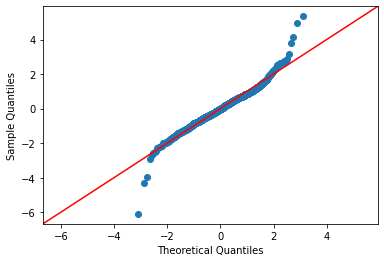

In [20]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

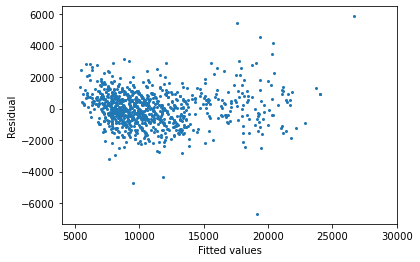

In [21]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [22]:
 ## 검증 데이터에 대한 예측 
    
pred_y2 = fitted_full_model.predict(test_x) 

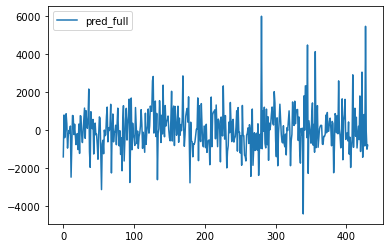

In [23]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1258732.048383448

## 변수선택법

In [26]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D88B58C1F0>, 'AIC': 19091.672267051123}


In [27]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1d88b57da90>,
 'AIC': 16988.641348858844}

In [28]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.5656077861785889 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17538.807178
Name: 211, dtype: object


In [29]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Disel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'cons

In [30]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.03381514549255371 seconds.
Processed  630 models on 2 predictors in 0.47926878929138184 seconds.
Processed  7140 models on 3 predictors in 6.012173175811768 seconds.
Total elapsed time: 6.694188356399536 seconds.


In [31]:
models

,AIC,model
1,17788.869983,<statsmodels.regression.linear_model.Regressio...
2,17538.807178,<statsmodels.regression.linear_model.Regressio...
3,17414.918918,<statsmodels.regression.linear_model.Regressio...


In [32]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2036.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:06:12   Log-Likelihood:                -8703.5
No. Observations:                1005   AIC:                         1.741e+04
Df Residuals:                    1001   BIC:                         1.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3298.9518    213.303     15.466      0.000    2880.379    3717.525
HP                 34.4462      2.980     11.558      0.000      28.598      40.295
Mfg_Year         1820.3432     31.606     57.596      0.000    1758.322    1882.364
const           -3.633e+06   6.32e+04    -57.507      0.000   -3.76e+06   -3.51e+06
==============================================================================
Omnibus:                      121.655   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.155
Skew:                           0.364   Prob(JB):                    3.43e-158
Kurtosis:                       7.097   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91319
full model AIC:  16988.64135
full model MSE:  13848195.16408
selected model Rsquared:  0.85917
selected model AIC:  17414.91892
selected model MSE:  13848195.16408


Text(0, 0.5, 'BIC')

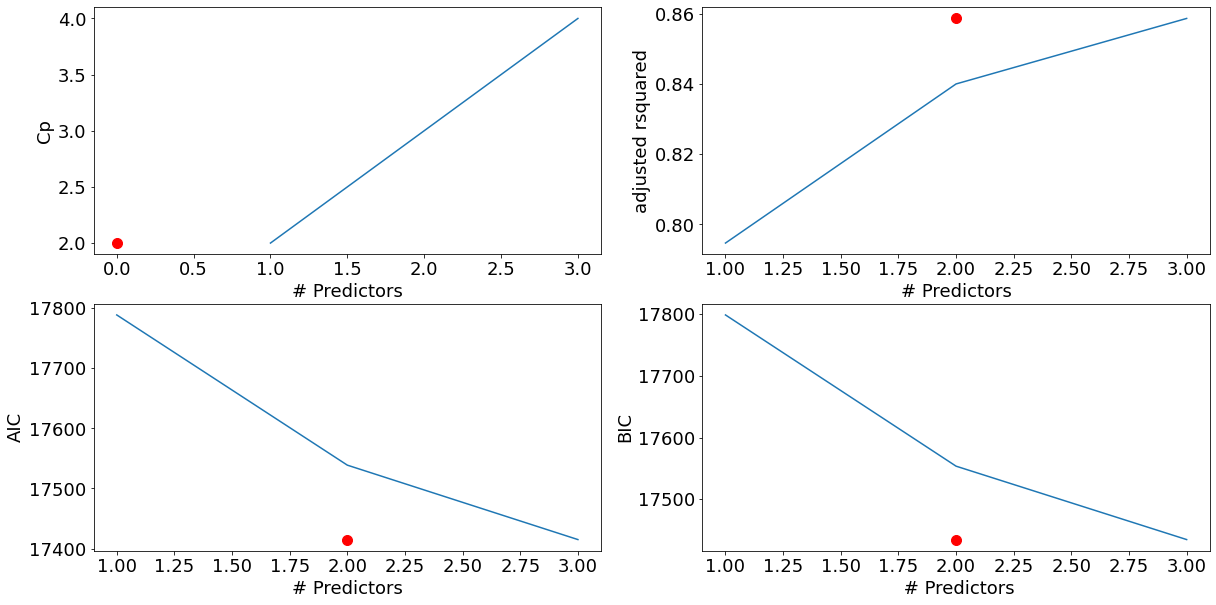

In [34]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

## 전진선택법

In [35]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [36]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [37]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.036482810974121094
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D89F075880>
Processed  35 models on 2 predictors in 0.02059030532836914
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D89F089F40>
Processed  34 models on 3 predictors in 0.024572372436523438
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FBEDC0>
Processed  33 models on 4 predictors in 0.027930259704589844
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FA3910>
Processed  32 models on 5 predictors in 0.03724265098571777
Selected predictors: ['Mfg_Year', 'Automatic_airco', '

In [38]:
Forward_best_model.aic

16976.120625890748

In [39]:
Forward_best_model.summary()

C:\Users\82107\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     464.7
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:08:50   Log-Likelihood:                -8465.1
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     982   BIC:                         1.709e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1449.2564     46.893     30.905      0.000    1357.234    1541.279
Automatic_airco   2340.3838    186.026     12.581      0.000    1975.330    2705.438
HP                  24.2868      3.509      6.921      0.000      17.400      31.173
Weight               8.1685      1.265      6.457      0.000       5.686      10.651
KM                  -0.0163      0.001    -12.155      0.000      -0.019      -0.014
Powered_Windows    407.3929     80.714      5.047      0.000     249.001     565.785
Quarterly_Tax       16.4909      1.883      8.757      0.000      12.795      20.186
Petrol            1146.3623    298.885      3.835      0.000     559.836    1732.888
Guarantee_Period    62.6998     13.220      4.743      0.000      36.757      88.643
Sport_Model        426.9080     90.073      4.740      0.000     250.150     603.666
Metallic_Rim       325.9975     92.386      3.529      0.000     144.700     507.294
Tow_Bar           -286.0380     80.663     -3.546      0.000    -444.330    -127.746
BOVAG_Guarantee    418.8921    132.354      3.165      0.002     159.162     678.622
Backseat_Divider  -351.1328    121.923     -2.880      0.004    -590.392    -111.873
Mfr_Guarantee      205.7837     77.190      2.666      0.008      54.307     357.260
CNG              -1206.9839    362.726     -3.328      0.001   -1918.791    -495.177
ABS               -302.6031    104.907     -2.884      0.004    -508.472     -96.735
Mfg_Month           27.5809     10.596      2.603      0.009       6.787      48.375
Automatic          376.0814    150.631      2.497      0.013      80.485     671.678
CD_Player          252.0237    101.087      2.493      0.013      53.652     450.395
Doors               74.0445     41.827      1.770      0.077      -8.036     156.125
Boardcomputer     -187.8843    121.097     -1.552      0.121    -425.522      49.754
Cylinders        -6.826e+05    2.2e+04    -31.041      0.000   -7.26e+05   -6.39e+05
Disel                     0          0        nan        nan           0           0
const            -1.706e+05   5497.334    -31.041      0.000   -1.81e+05    -1.6e+05
==============================================================================
Omnibus:                       84.017   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.746
Skew:                           0.141   Prob(JB):                     1.77e-94
Kurtosis:                       6.199   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design ma

## 후진소거법

In [40]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [41]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [42]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.08669638633728027
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Disel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FDEB80>
Processed  35 models on 34 predictors in 0.07067155838012695
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Disel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year'

In [43]:
Backward_best_model.aic

16974.853546804454

## 단계적 선택법

In [44]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [45]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.03075885772705078
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FDE700>
forward
Processed  1 models on 0 predictors in 0.0010004043579101562
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FA5DC0>
Processed  35 models on 2 predictors in 0.030621767044067383
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FDEA60>
forward
Processed  2 models on 1 predictors in 0.003250598907470703
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FBA880>
Processed  34 models on 3 predictors in 0.030756711959838867
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model

Processed  15 models on 14 predictors in 0.021814823150634766
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar', 'BOVAG_Guarantee', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FA5250>
Processed  21 models on 16 predictors in 0.02898883819580078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar', 'BOVAG_Guarantee', 'Backseat_Divider', 'Mfr_Guarantee', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FD90A0>
forward
Processed  16 models on 15 predictors in 0.019318103790283203
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Gua

backward
Processed  12 models on 25 predictors in 0.025719165802001953
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar', 'BOVAG_Guarantee', 'Backseat_Divider', 'Mfr_Guarantee', 'CNG', 'ABS', 'Mfg_Month', 'Automatic', 'CD_Player', 'Doors', 'Boardcomputer', 'Cylinders', 'Disel', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D88B379130>
forward
Processed  25 models on 24 predictors in 0.039156436920166016
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar', 'BOVAG_Guarantee', 'Backseat_Divider', 'Mfr_Guarantee', 'CNG', 'ABS', 'Mfg_Month', 'Automatic', 'CD_Player', 'Doors', 'Boardcomputer', 'Cylinders', 'Disel', 'const']  AIC: <statsmodels.regression.linear_model.Regress

Processed  12 models on 25 predictors in 0.02303791046142578
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar', 'BOVAG_Guarantee', 'Backseat_Divider', 'Mfr_Guarantee', 'CNG', 'ABS', 'Mfg_Month', 'Automatic', 'CD_Player', 'Doors', 'Boardcomputer', 'Cylinders', 'Disel', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8D3FCE5B0>
forward
Processed  25 models on 24 predictors in 0.03592491149902344
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar', 'BOVAG_Guarantee', 'Backseat_Divider', 'Mfr_Guarantee', 'CNG', 'ABS', 'Mfg_Month', 'Automatic', 'CD_Player', 'Doors', 'Boardcomputer', 'Cylinders', 'Disel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsW

In [46]:
Stepwise_best_model.aic

16976.120625890748

## 성능평가

In [47]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (25,) (25,)


In [48]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [49]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [50]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [51]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   1258732.048383  1248945.672315  1264644.682392  1248945.672315
RMSE     1121.932283      1117.56238     1124.564219      1117.56238
MAE        815.45544      814.522459      817.608792      814.522459
MAPE        8.320674        8.318059        8.340297        8.318059


In [52]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
25
25
25
